In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymssql

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import matplotlib.colors as mcolors
import numpy as np

In [6]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=localhost;"
    "Database=cucasDWH;"
    "Trusted_Connection=yes;"
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\1055615176.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


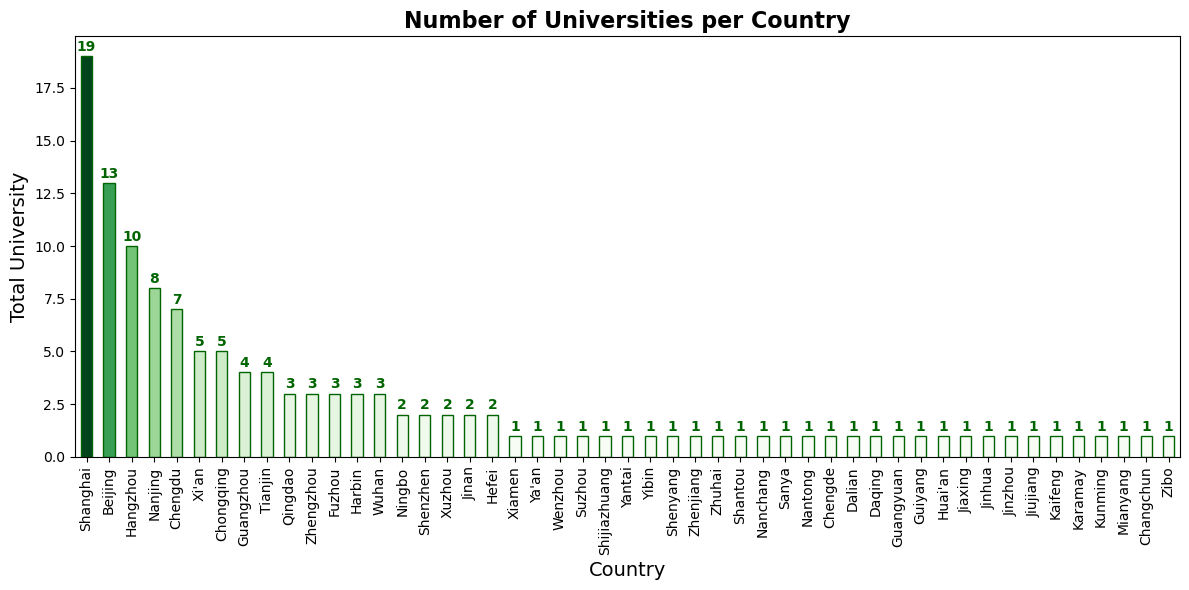

In [7]:
#####################################################################
################## number of universities per country ###############
#####################################################################
query = """
SELECT University, Location AS Country
FROM gold.ScholarshipDIM
"""

df = pd.read_sql_query(query, conn)

Uni_Count_Country = df.groupby('Country')["University"].nunique().sort_values(ascending=False)

cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Uni_Count_Country.min(), vmax=Uni_Count_Country.max())
colors = [cmap(norm(value)) for value in Uni_Count_Country]

ax = Uni_Count_Country.plot(kind='bar', color=colors, edgecolor='#006400', figsize=(12,6))

plt.title('Number of Universities per Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total University', fontsize=14)
plt.xticks(rotation=90)  
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#006400')  

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\2305749395.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


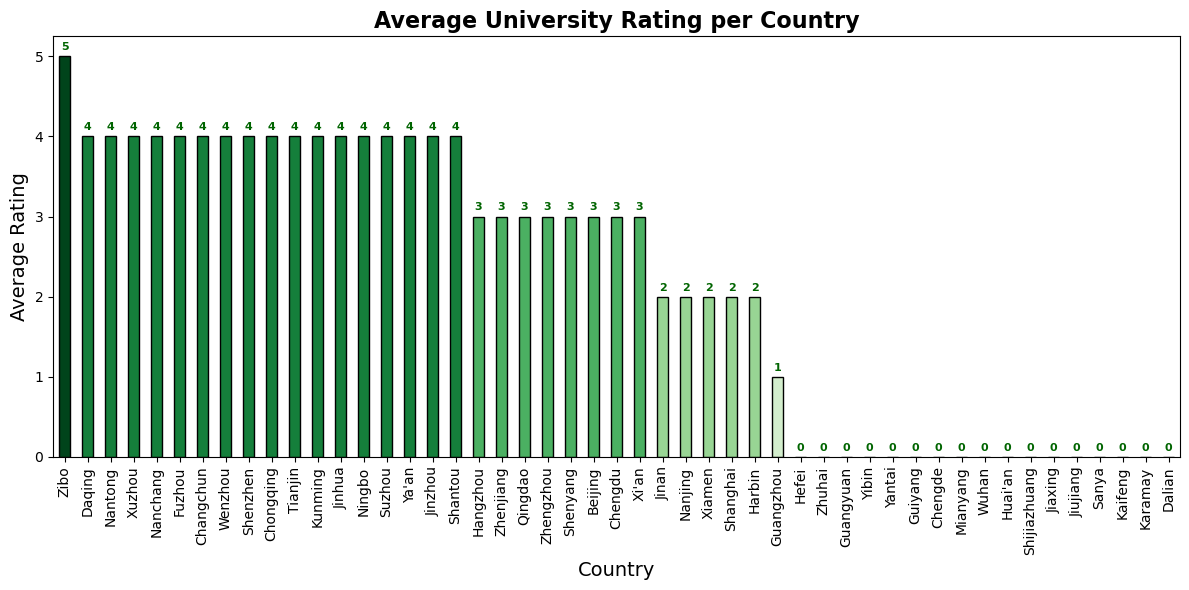

In [8]:
#####################################################################
############## average university rating per country ################
#####################################################################


query = """
SELECT University, Location AS Country, Rating
FROM gold.ScholarshipDIM
WHERE Rating IS NOT NULL
"""

df = pd.read_sql_query(query, conn)


Avg_Rating_Country = df.groupby('Country')["Rating"].mean().sort_values(ascending=False)
Avg_Rating_Country = Avg_Rating_Country.astype(int) 


cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Avg_Rating_Country.min(), vmax=Avg_Rating_Country.max())
colors = [cmap(norm(value)) for value in Avg_Rating_Country]


ax = Avg_Rating_Country.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))

plt.title('Average University Rating per Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)  

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\2739079772.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


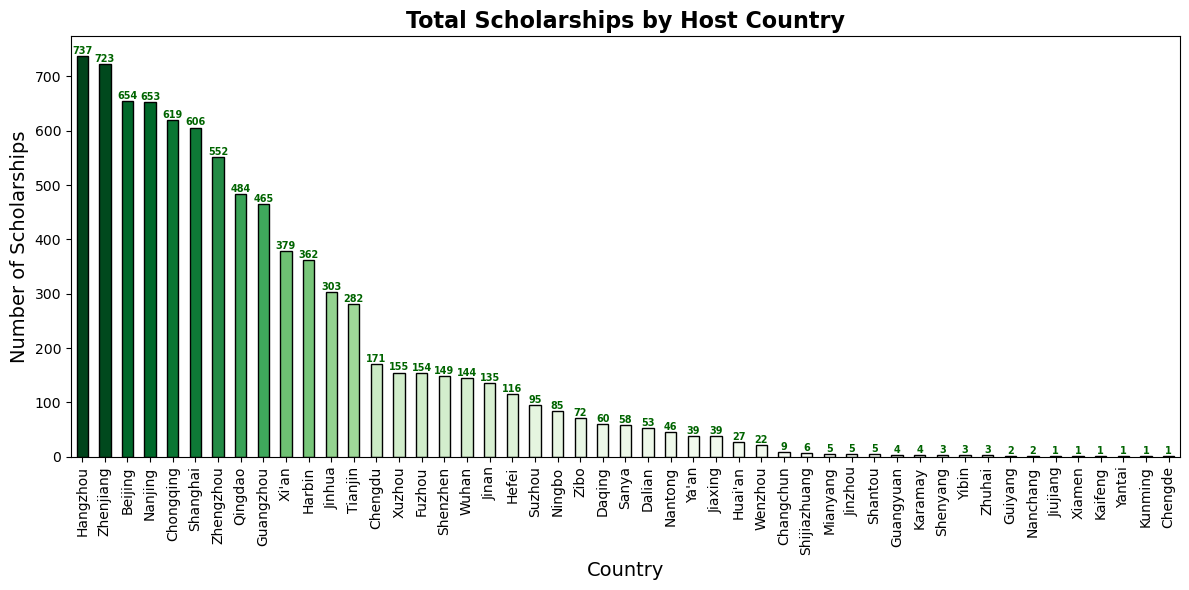

In [34]:
#####################################################################
################# Scholarships Count by Host Country ################
#####################################################################

query = """
SELECT Location AS Country, Schol_ID
FROM gold.ScholarshipDIM
"""

df = pd.read_sql_query(query, conn)


Scholarship_Count = df.groupby('Country')["Schol_ID"].nunique().sort_values(ascending=False)
cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Scholarship_Count.min(), vmax=Scholarship_Count.max())
colors = [cmap(norm(value)) for value in Scholarship_Count]

ax = Scholarship_Count.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))
plt.title('Total Scholarships by Host Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Scholarships', fontsize=14)
plt.xticks(rotation=90) 

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=7, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\525760783.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


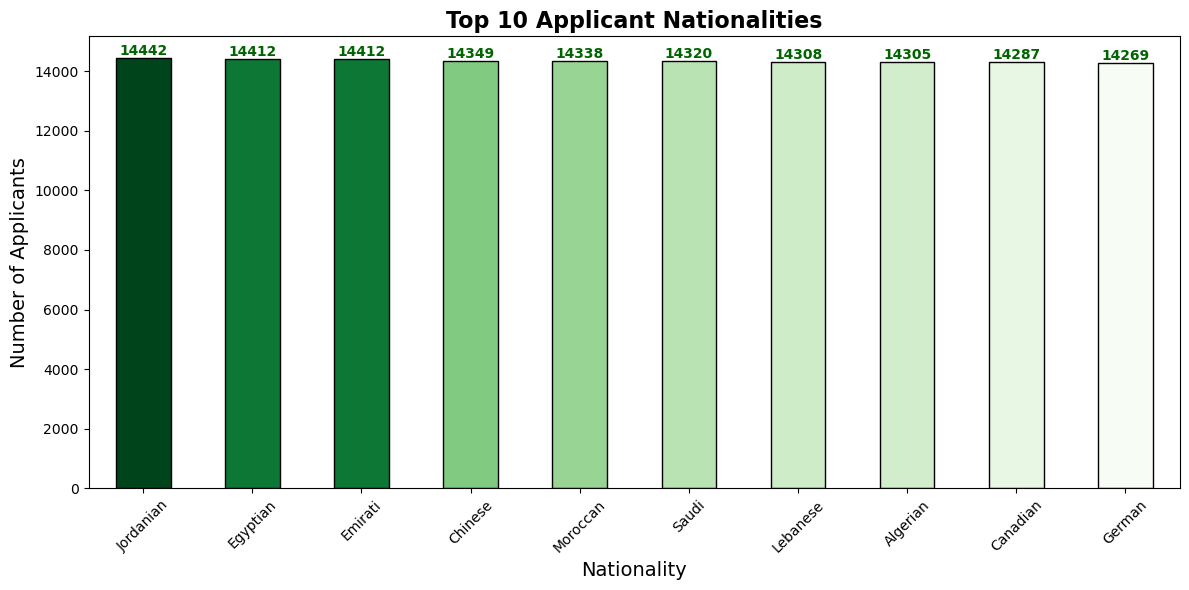

In [33]:
#####################################################################
############ top applicant nationalities (international) ############
#####################################################################

query = """
SELECT Nationality
FROM gold.ApplicantDIM
WHERE Nationality IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

Top_Nationalities = df['Nationality'].value_counts().sort_values(ascending=False)

Top_Nationalities = Top_Nationalities.head(10)

cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Top_Nationalities.min(), vmax=Top_Nationalities.max())
colors = [cmap(norm(value)) for value in Top_Nationalities]

ax = Top_Nationalities.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))

plt.title('Top 10 Applicant Nationalities', fontsize=16, fontweight='bold')
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Applicants', fontsize=14)
plt.xticks(rotation=45) 

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\3883080044.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


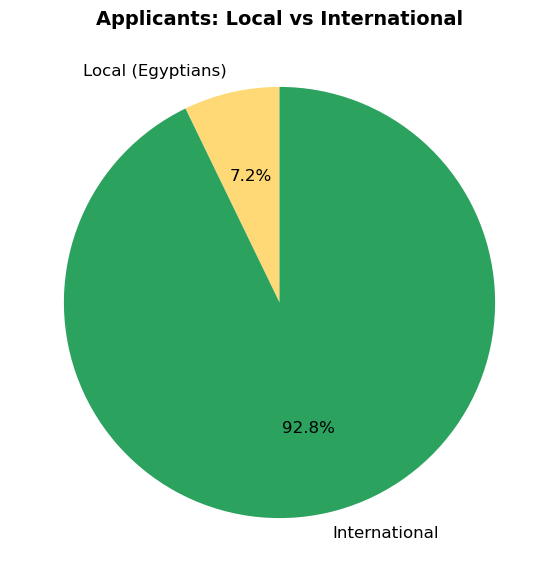

In [40]:
#####################################################################
########### local vs international ratio by host country ############
#####################################################################

query = """
SELECT A.Nationality, S.Tuition, S.ScholarshipCoverageLivingExpense
FROM Gold.ApplicationFact AF
LEFT JOIN Gold.ApplicantDIM A ON AF.ApplicantKey = A.ApplicantKey
LEFT JOIN Gold.ScholarshipDIM S ON AF.ScholarshipKey = S.ScholarshipKey
WHERE A.Nationality IS NOT NULL
"""

df = pd.read_sql_query(query, conn)
df['Tuition'] = pd.to_numeric(df['Tuition'], errors='coerce')
df['ScholarshipCoverageLivingExpense'] = pd.to_numeric(df['ScholarshipCoverageLivingExpense'], errors='coerce')
df['IsLocal'] = df['Nationality'].str.lower().str.strip().str.contains('egypt')

applicants_count = df['IsLocal'].value_counts()
counts = [applicants_count.get(True, 0), applicants_count.get(False, 0)]
labels = ['Local (Egyptians)', 'International']

df['TotalCost'] = df['Tuition'] + df['ScholarshipCoverageLivingExpense']
avg_cost_local = df[df['IsLocal']]['TotalCost'].mean()
avg_cost_intl = df[~df['IsLocal']]['TotalCost'].mean()


colors = ['#fed976','#2ca25f']

plt.figure(figsize=(7,7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize':12})
plt.title('Applicants: Local vs International', fontsize=14, fontweight='bold')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\3827852760.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


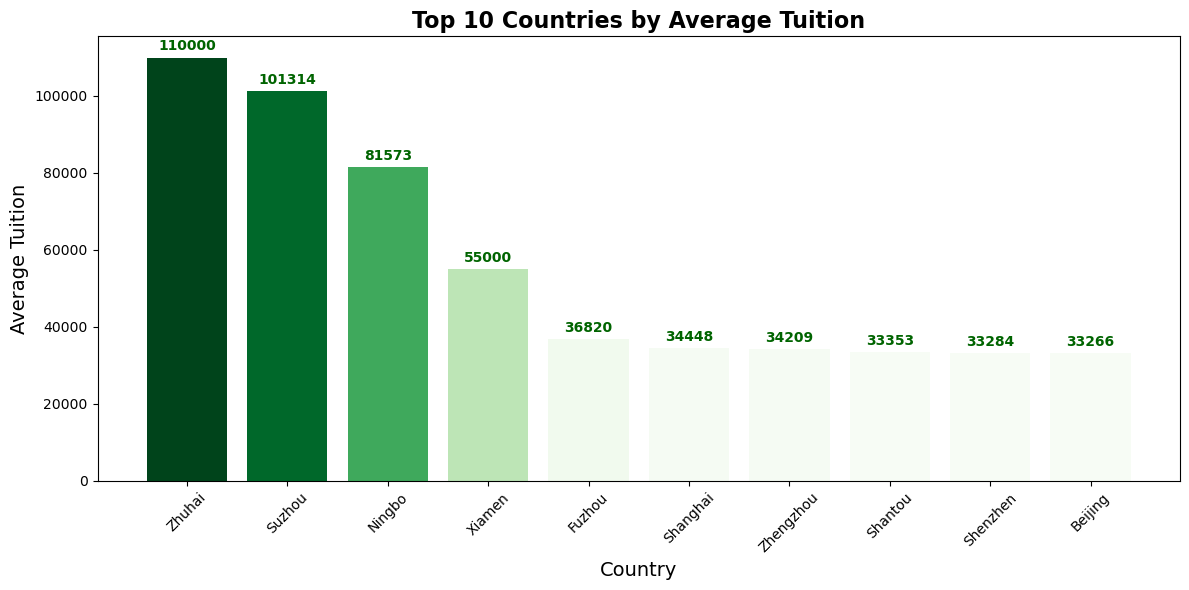

In [15]:
#####################################################################
################# Top 10 Countries by Average Tuition ###############
#####################################################################

query = """
SELECT S.Location AS Country, 
       S.Tuition
FROM Gold.ApplicationFact AF
LEFT JOIN Gold.ScholarshipDIM S ON AF.ScholarshipKey = S.ScholarshipKey
WHERE S.Location IS NOT NULL
"""

df = pd.read_sql_query(query, conn)
df['Tuition'] = pd.to_numeric(df['Tuition'], errors='coerce').fillna(0)
country_avg = df.groupby('Country')['Tuition'].mean().sort_values(ascending=False).reset_index()
top10 = country_avg.head(10)
cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=top10['Tuition'].min(), vmax=top10['Tuition'].max())
colors = [cmap(norm(x)) for x in top10['Tuition']]
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(top10['Country'], top10['Tuition'], color=colors)

plt.title('Top 10 Countries by Average Tuition', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Tuition', fontsize=14)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                color='darkgreen')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\1235684082.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query(query1, conn)


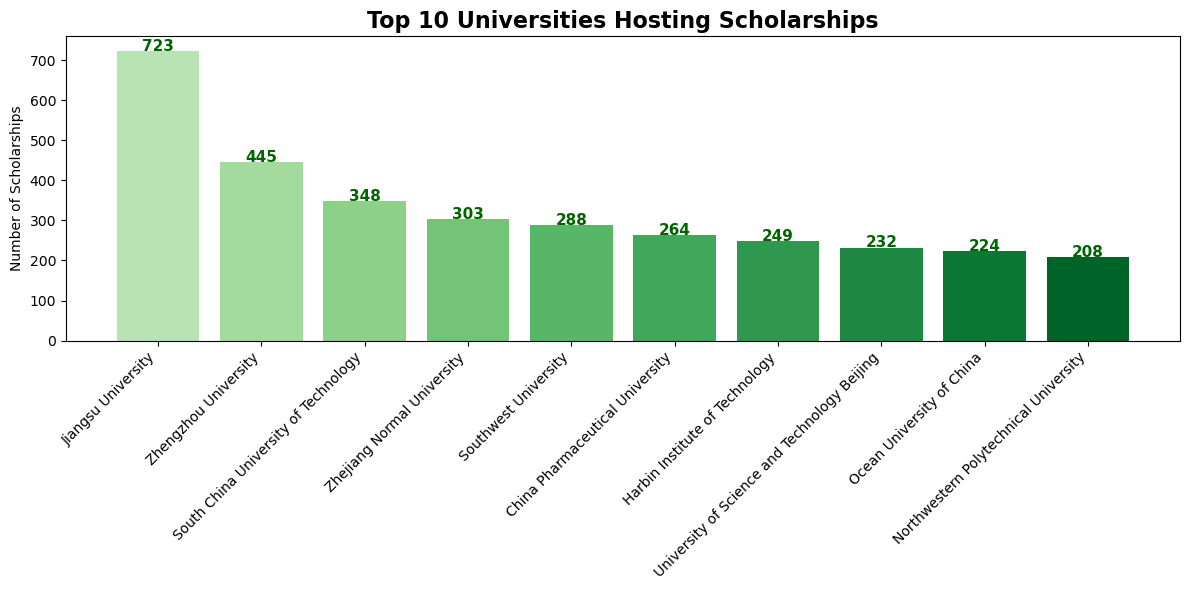

In [18]:
#####################################################################
####  Which universities host the highest number of scholarships ####
#####################################################################
query1 = """
SELECT University
FROM Gold.ScholarshipDIM
WHERE University IS NOT NULL
"""

df1 = pd.read_sql_query(query1, conn)

top_universities = df1['University'].value_counts().head(10)
top_uni = df1['University'].value_counts().head(10)

colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(top_uni)))

plt.figure(figsize=(12,6))
plt.bar(top_uni.index, top_uni.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Universities Hosting Scholarships", fontsize=16, fontweight="bold")
plt.ylabel("Number of Scholarships")

for i, val in enumerate(top_uni.values):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=11, color='darkgreen', fontweight="bold")

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\2836924101.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(query2, conn)


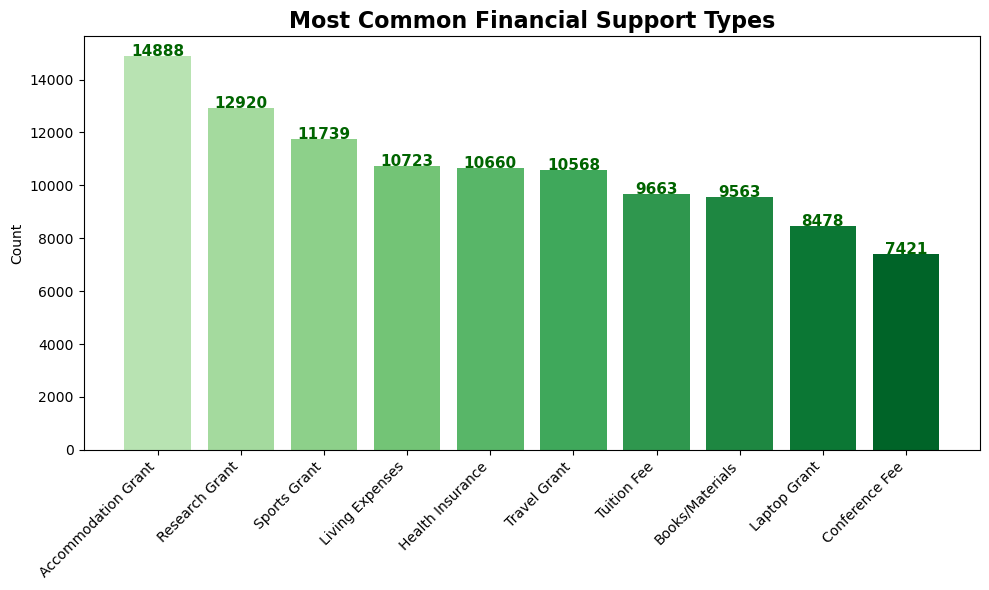

In [20]:
#####################################################################
################ Most Common Financial Support Types ################
#####################################################################

query2 = """
SELECT SupportType
FROM Gold.FinancialSupportDIM
WHERE SupportType IS NOT NULL
"""

df2 = pd.read_sql_query(query2, conn)

common_support = df2['SupportType'].value_counts()
common_support = df2['SupportType'].value_counts()

colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(common_support)))

plt.figure(figsize=(10,6))
plt.bar(common_support.index, common_support.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Financial Support Types", fontsize=16, fontweight="bold")
plt.ylabel("Count")

for i, val in enumerate(common_support.values):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=11, color='darkgreen', fontweight="bold")

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\3017492270.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(query3, conn)


StartYear
2019      1
2023      1
2025     34
2026    123
2027      4
Name: University, dtype: int64


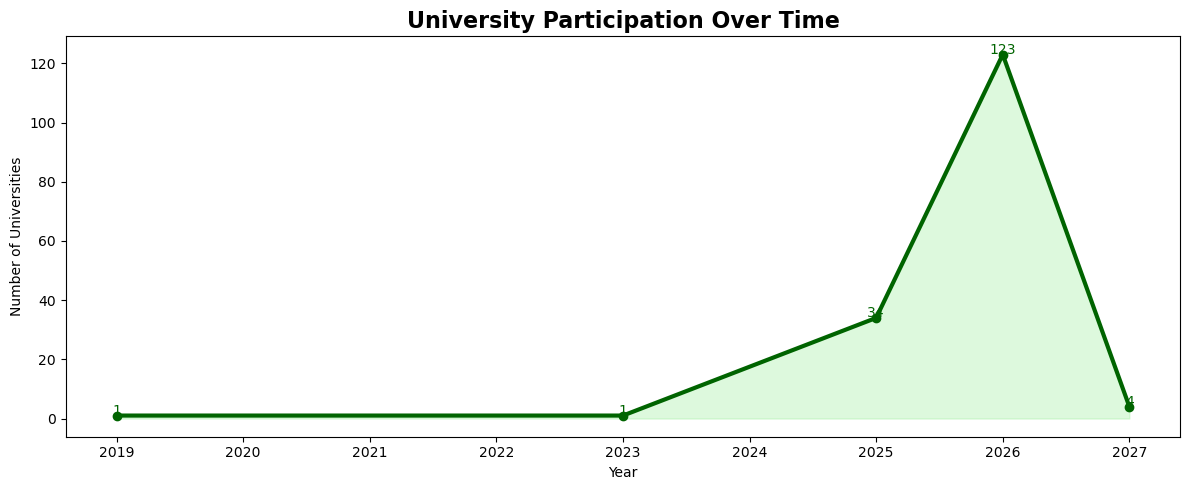

In [21]:
#####################################################################
# Has the Number of Participating Universities Increased Over Time? #
#####################################################################

query3 = """
SELECT University, StartYear
FROM Gold.ScholarshipDIM
WHERE University IS NOT NULL AND StartYear IS NOT NULL
"""

df3 = pd.read_sql_query(query3, conn)

trend = df3.groupby('StartYear')['University'].nunique()
print(trend)

trend = df3.groupby('StartYear')['University'].nunique()

colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(trend)))

plt.figure(figsize=(12,5))
plt.plot(trend.index, trend.values, marker='o', linewidth=3, color='darkgreen')
plt.fill_between(trend.index, trend.values, color="lightgreen", alpha=0.3)

plt.title("University Participation Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Universities")

for x, y in zip(trend.index, trend.values):
    plt.text(x, y + 0.2, str(y), ha='center', fontsize=10, color='darkgreen')

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\1002702926.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql_query(query4, conn)


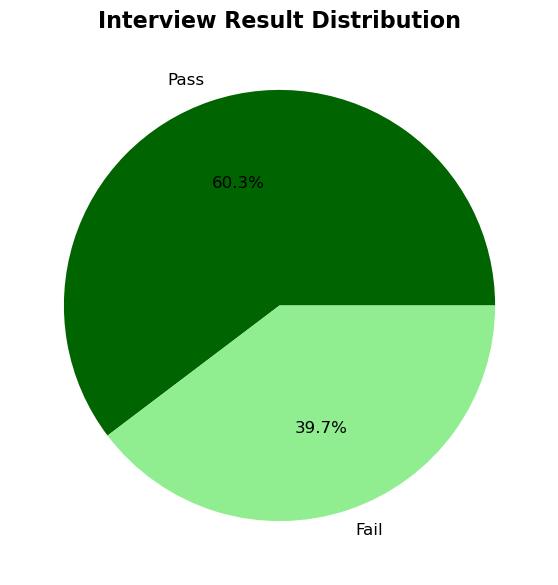

In [22]:
#####################################################################
######### Interview Result Distribution (Accepted vs Rejected) ######
#####################################################################

query4 = """
SELECT Result
FROM Gold.InterviewDim
WHERE Result IS NOT NULL
"""

df4 = pd.read_sql_query(query4, conn)

interview_dist = df4['Result'].value_counts()
interview_dist = df4['Result'].value_counts()

colors = ['darkgreen', 'lightgreen']

plt.figure(figsize=(7,7))
plt.pie(interview_dist.values,
        labels=interview_dist.index,
        autopct='%1.1f%%',
        colors=colors,
        textprops={'fontsize': 12})

plt.title("Interview Result Distribution", fontsize=16, fontweight="bold")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27744\3968721819.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql_query(query5, conn)


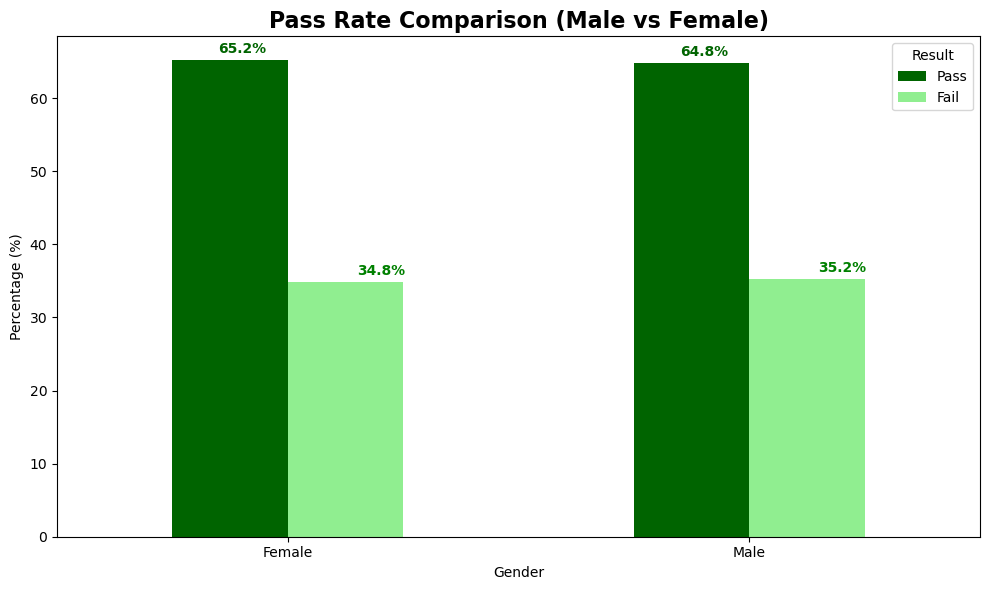

In [27]:
#####################################################################
#### Comparison of pass rates between male and female applicants ####
#####################################################################

query5 = """
SELECT A.Gender, E.Result
FROM Gold.ApplicantDIM A
LEFT JOIN Gold.ExamDim E
ON A.ApplicantID = E.ApplicationID
WHERE A.Gender IS NOT NULL AND E.Result IS NOT NULL
"""

df5 = pd.read_sql_query(query5, conn)
pass_rate = df5.groupby('Gender')['Result'].value_counts(normalize=True).unstack() * 100
pass_rate = pass_rate.fillna(0)

if 'Pass' in pass_rate.columns:
    cols = ['Pass'] + [col for col in pass_rate.columns if col != 'Pass']
    pass_rate = pass_rate[cols]

colors = ['darkgreen', 'lightgreen']

ax = pass_rate.plot(kind='bar',
                    figsize=(10,6),
                    color=colors)

plt.title("Pass Rate Comparison (Male vs Female)", fontsize=16, fontweight='bold')
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

for i, gender in enumerate(pass_rate.index):
    pass_value = pass_rate.loc[gender, 'Pass']

    plt.text(i - 0.15,
             pass_value + 1,
             f"{pass_value:.1f}%",
             fontsize=10,
             color='darkgreen',
             fontweight='bold')

    for j, col in enumerate(pass_rate.columns):
        if col != 'Pass':
            fail_value = pass_rate.loc[gender, col]
            plt.text(i + 0.15,
                     fail_value + 1,
                     f"{fail_value:.1f}%",
                     fontsize=10,
                     color='green',
                     fontweight='bold')

plt.tight_layout()
plt.show()